In [1]:
import pandas as pd
import numpy as np
# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
#K-Means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

## Loading Dataset from file: 'stud-stat-anonymous.csv'

In [2]:
# make an assert with collumn names 
# np.all - look at the collumns etc.
# if structure is changed, rise an exception


# Load input data
#X = np.loadtxt('../Data/sales.csv', delimiter=',', skiprows=1,
#usecols=(1,2))


data=pd.read_csv('stud-stat-anonymous.csv')

#data= data.drop("Del", axis=1)
df = pd.DataFrame(data)
df.head(10)


,Unnamed: 0,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
0,0,214366,100%,Web and Soft Electives,Big Data,100%,NaN,NaN,NaN,NaN,NaN,NaN
1,1,680092,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
2,2,906441,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
3,3,432875,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
4,4,146518,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
5,5,864755,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
6,6,464972,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
7,7,728877,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
8,8,419492,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
9,9,205702,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN


# Data Preprocessing

## Creating array of expected column names

In [3]:
exp_columns = ["Unnamed: 0", "Id", "Samlet fravær", "Klasse",
               "Fag","Fravær", "Fag.1", "Fravær.1", "Fag.2", "Fravær.2", "Fag.3", "Fravær.3"]

#creating array of actual column names
act_columns = list(df)

#comparing expected and actual names
#compare_value should get value false, if expected and actual columns are the same
compare_value = bool((set(act_columns) - set(exp_columns)))
assert (compare_value==False), "Column names of uploaded dataset differ from expected"

## Safely droping column "Unnamed: 0"

In [4]:
columns_df = list(df)
if any("Unnamed: 0" in columns_df for s in columns_df):
    df = df.drop("Unnamed: 0", axis=1)
df.head()

#renaming column values - making them more accesible for various functions
df.rename(columns={'Samlet fravær':'Samlet_fravaer',
                   'Fag.1':'Fag_1',
                   'Fravær':'Fravaer',
                   'Fravær.1':'Fravaer_1',
                   'Fag.2':'Fag_2',
                   'Fravær.2':"Fravaer_2",
                   'Fag.3':'Fag_3',
                   'Fravær.3':'Fravaer_3'}, inplace=True)


## Stripping all 'Fravaer' columns from '%'

In [5]:
df['Fravaer'] = df['Fravaer'].str.replace("%","")
df['Samlet_fravaer'] = df['Samlet_fravaer'].str.replace("%","")
df['Fravaer_1'] = df['Fravaer_1'].str.replace("%","")
df['Fravaer_2'] = df['Fravaer_2'].str.replace("%","")
df['Fravaer_3'] = df['Fravaer_3'].str.replace("%","")
df.dtypes

Id                 int64
Samlet_fravaer    object
Klasse            object
Fag               object
Fravaer           object
Fag_1             object
Fravaer_1         object
Fag_2             object
Fravaer_2         object
Fag_3             object
Fravaer_3         object
dtype: object

## Transforming Danish fonts

In [6]:
df['Fravaer'] = df['Samlet_fravaer'].astype('float')
df['Samlet_fravaer'] = df['Samlet_fravaer'].astype('float')
df['Fravaer_1'] = df['Fravaer_1'].astype('float')
df['Fravaer_2'] = df['Fravaer_2'].astype('float')
df['Fravaer_3'] = df['Fravaer_3'].astype('float')
df.dtypes

Id                  int64
Samlet_fravaer    float64
Klasse             object
Fag                object
Fravaer           float64
Fag_1              object
Fravaer_1         float64
Fag_2              object
Fravaer_2         float64
Fag_3              object
Fravaer_3         float64
dtype: object

# Statistics

In [7]:
df.head(3)

,Id,Samlet_fravaer,Klasse,Fag,Fravaer,Fag_1,Fravaer_1,Fag_2,Fravaer_2,Fag_3,Fravaer_3
0,214366,100.0,Web and Soft Electives,Big Data,100.0,NaN,NaN,NaN,NaN,NaN,NaN
1,680092,100.0,Web and Soft Electives,Angular,100.0,Web Security,100.0,NaN,NaN,NaN,NaN
2,906441,100.0,Web and Soft Electives,Angular,100.0,Web Security,100.0,NaN,NaN,NaN,NaN


### Students Count

In [8]:
# All students in dataset
df['Id'].count()

224

In [9]:
# How many different Courses ('Klasse') is there
# How many students each consists consists

df['Klasse'].value_counts()

Web and Soft Electives    77
SD18i                     37
SD19w1                    32
ITS18a                    29
Web19w1                   29
ITS19w1                   20
Name: Klasse, dtype: int64

In [10]:
f = df['Fag_1'].value_counts()
fag = f.index.tolist()
print(f)

Web Security              48
System Integration        36
Test                      33
Interface Design          29
IT Governance 2           29
Databases                 27
Net. and Com. security    20
Quantum Computing          1
Name: Fag_1, dtype: int64


In [11]:
f = df['Fag_2'].value_counts()
fag = f.index.tolist()
print(f)

Data Science                33
Databases                   29
Security Engineering        29
Test                        27
System Security             20
Software Design Patterns    13
Big Data                     9
Quantum Computing            6
Web Security                 3
Name: Fag_2, dtype: int64


In [12]:
df['Fag_3'].fillna( "",inplace=True)
f = df['Fag_3'].value_counts()
fag = f.index.tolist()
print(f)

                        195
Reverse Eng. Malware     29
Name: Fag_3, dtype: int64


In [13]:
# students asigned to
f = df['Fag'].value_counts()
fag = f.index.tolist()
print(f)

Angular                        48
DLS                            37
Databases                      32
Web Development                29
Security for mobile devices    29
Intro til IT Sikkerhed         20
Quantum Computing              11
Software Design Patterns        9
Big Data                        6
Web Security                    2
Data Science                    1
Name: Fag, dtype: int64


In [14]:
dictionary = {fag[0]: f[0], fag[1]: f[1], fag[2] : f[2],
              fag[3] : f[3], fag[4] : f[4], fag[5] : f[5], fag[6] : f[6],
             fag[7]:f[7], fag[8]:f[8], fag[9]:f[9], fag[10]:f[10]}

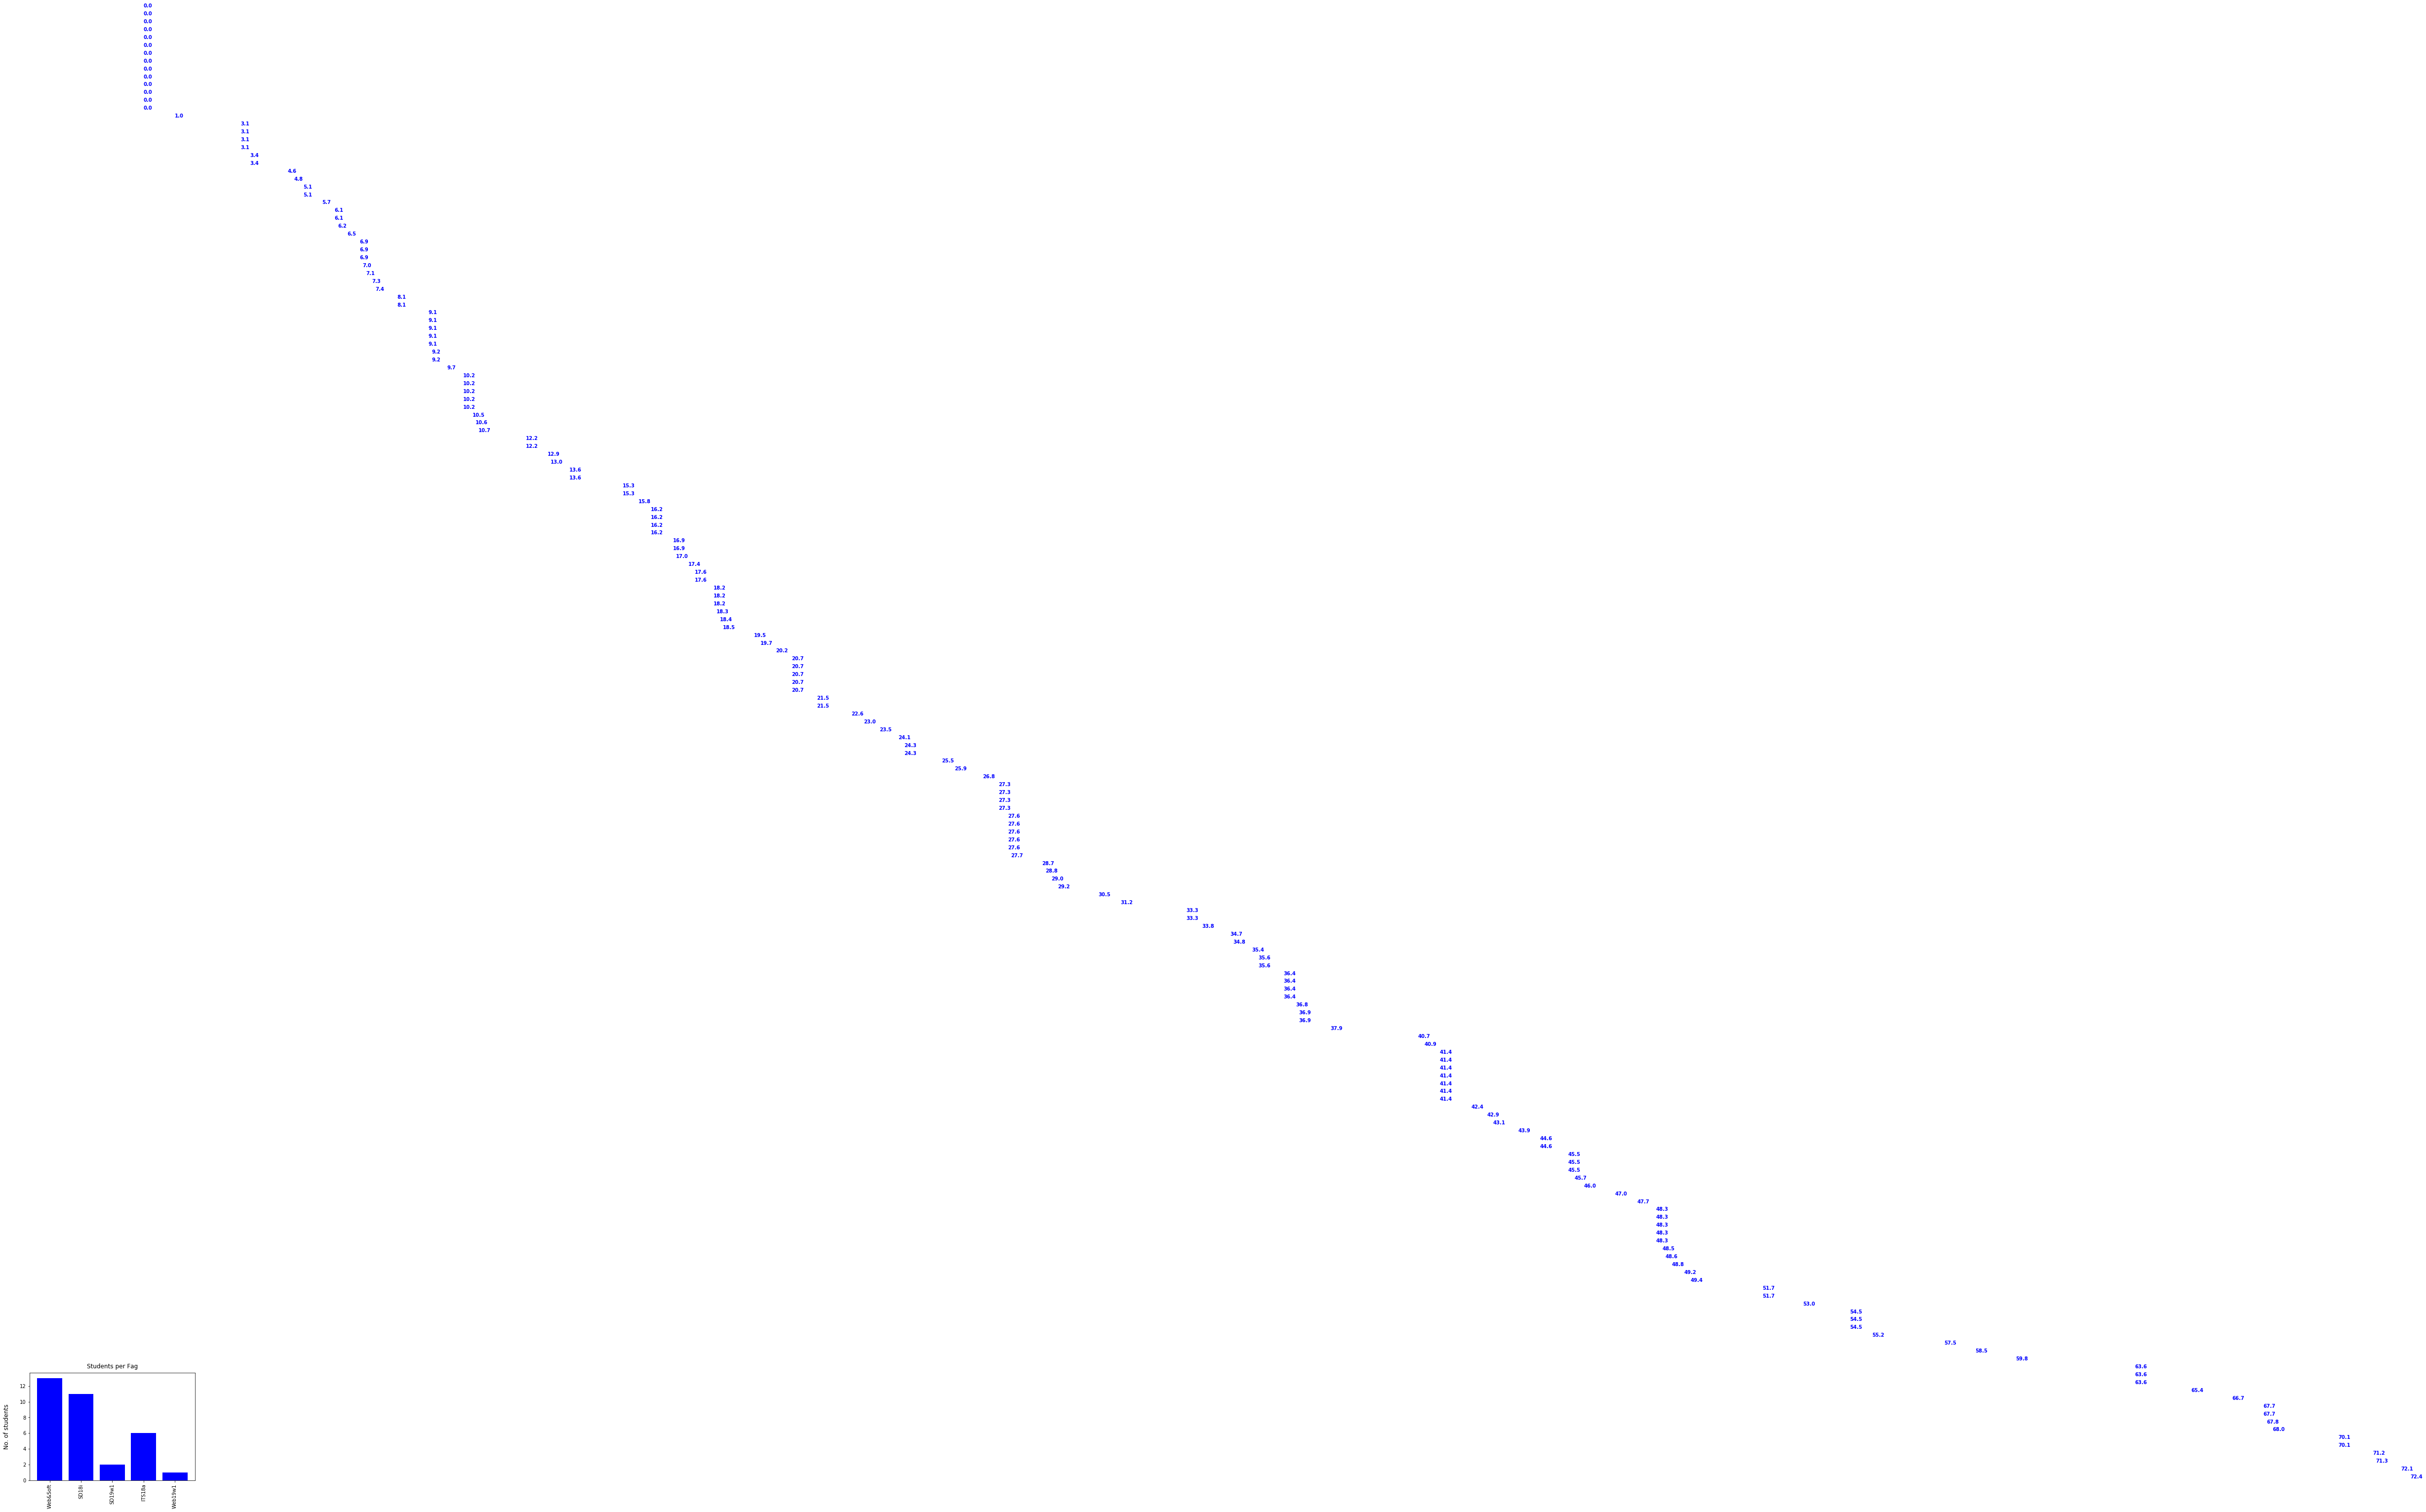

In [57]:
h_hist = plt.bar(list(dictionary.keys()), dictionary.values(), color='b')
plt.title('Students per ''Fag''', pad=10)
plt.ylabel('No. of students', labelpad=20, fontsize=12)
plt.xticks(rotation='vertical')
#plt.yticks(range(15))
for i, v in enumerate(f):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
plt.show()

### Absence

#### Absence per 'Klasse'

In [16]:
# How many students have absence above 75%
(df['Samlet_fravaer'] >= 75).sum()

36

In [17]:
# How many students have absence 100%
(df['Samlet_fravaer'] == 100).sum()

23

In [18]:
# Web and Soft Electives
a = ((df['Samlet_fravaer'] >= 75) & (df['Klasse'] == 'Web and Soft Electives')).sum()

# SD18i
b = ((df['Samlet_fravaer'] >= 75) & (df['Klasse'] == 'SD18i')).sum()

# SD19w1
c = ((df['Samlet_fravaer'] >= 75) & (df['Klasse'] == 'SD19w1')).sum()

# ITS18a
d = ((df['Samlet_fravaer'] >= 75) & (df['Klasse'] == 'ITS18a')).sum()

# Web19w1
e = ((df['Samlet_fravaer'] >= 75) & (df['Klasse'] == 'Web19w1')).sum()

# ITS19w1
f = ((df['Samlet_fravaer'] >= 75) & (df['Klasse'] == 'SD19w1')).sum()


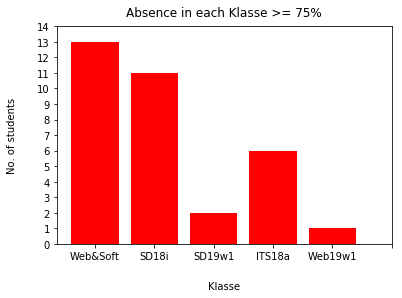

In [19]:
dictionary = {'Web&Soft':a, 'SD18i':b, 'SD19w1':c, 'ITS18a':d, 'Web19w1':e, 'SD19w1':f}

h_hist = plt.bar(list(dictionary.keys()), dictionary.values(), color='r')
plt.title('Absence in each ''Klasse'' >= 75%', pad=10)
plt.xlabel('Klasse', labelpad=20)
plt.ylabel('No. of students', labelpad=20)
plt.xticks(range(6))
plt.yticks(range(15))
plt.show()

#### Absence per Fag

In [20]:
# 
a = ((df['Samlet_fravaer'] >= 75) & (df['Fag'] == 'Web and Soft Electives')).sum()

# SD18i
b = ((df['Samlet_fravaer'] >= 75) & (df['Fag'] == 'SD18i')).sum()

# SD19w1
c = ((df['Samlet_fravaer'] >= 75) & (df['Fag'] == 'SD19w1')).sum()

# ITS18a
d = ((df['Samlet_fravaer'] >= 75) & (df['Fag'] == 'ITS18a')).sum()

# Web19w1
e = ((df['Samlet_fravaer'] >= 75) & (df['Fag'] == 'Web19w1')).sum()

# ITS19w1
f = ((df['Samlet_fravaer'] >= 75) & (df['Fag'] == 'SD19w1')).sum()

## Dropping students with absence above 75%

In [21]:
for index, row in df.iterrows():
    value = row["Samlet_fravaer"]
    if value >= 75:
        df.drop(index, inplace=True)
df.head()

,Id,Samlet_fravaer,Klasse,Fag,Fravaer,Fag_1,Fravaer_1,Fag_2,Fravaer_2,Fag_3,Fravaer_3
36,635774,72.4,SD18i,DLS,72.4,System Integration,100.0,Data Science,75.00,,NaN
37,646053,72.1,SD18i,DLS,72.1,System Integration,0.0,Big Data,81.82,,NaN
38,879390,71.3,ITS19w1,Intro til IT Sikkerhed,71.3,Net. and Com. security,75.0,System Security,88.89,,NaN
39,666991,71.2,Web and Soft Electives,Big Data,71.2,Databases,50.0,Test,100.00,,NaN
40,397345,70.1,ITS19w1,Intro til IT Sikkerhed,70.1,Net. and Com. security,100.0,System Security,55.56,,NaN


In [22]:
#encoding 'Klasse'
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
#f2['Klasse'] = labelencoder.fit_transform(df2['Klasse'])

#df2['Fag'].astype('category')
#df2['Fag'] = labelencoder.fit_transform(df2['Fag'])
#df2.head()
#encoding to one hot vector:
#onehotencoder = OneHotEncoder([2])


## Reducing number of columns in dataframe, referencing 'Fag'

- shaping new dataframe as 'df2'

In [23]:
df2 = pd.DataFrame(columns=['Id', 'Samlet_fravaer', 'Klasse', 'Fag', 'Fravaer'])

# Iterating over 'df' and copying appropriate data to target cells of 'df2'

A = df.iloc[:, 0:5]
B = df.iloc[:, [0, 1, 2, 5, 6]]
C = df.iloc[:, [0, 1, 2, 7, 8]]
D = df.iloc[:, [0, 1, 2, 9, 10]]

#changing column names so they match across A-D
B.rename(columns={"Fag_1":"Fag", "Fravaer_1":"Fravaer"}, inplace = True)
C.rename(columns={"Fag_2":"Fag", "Fravaer_2":"Fravaer"}, inplace = True)
D.rename(columns={"Fag_3":"Fag", "Fravaer_3":"Fravaer"}, inplace = True)

#concatinating Dataframe in One
frames=[A, B, C, D]
df2 = pd.concat(frames, sort=False)
df2.head()

/home/quenar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Id,Samlet_fravaer,Klasse,Fag,Fravaer
36,635774,72.4,SD18i,DLS,72.4
37,646053,72.1,SD18i,DLS,72.1
38,879390,71.3,ITS19w1,Intro til IT Sikkerhed,71.3
39,666991,71.2,Web and Soft Electives,Big Data,71.2
40,397345,70.1,ITS19w1,Intro til IT Sikkerhed,70.1


In [24]:
f = df2['Fag'].value_counts()
fag = f.index.tolist()
print(f)

                               165
Databases                       85
Test                            57
Web Security                    42
Angular                         37
Data Science                    33
Interface Design                28
Web Development                 28
DLS                             26
System Integration              25
IT Governance 2                 23
Security Engineering            23
Reverse Eng. Malware            23
Security for mobile devices     23
Software Design Patterns        18
Net. and Com. security          17
Intro til IT Sikkerhed          17
System Security                 17
Quantum Computing               16
Big Data                        11
Name: Fag, dtype: int64


In [25]:
#dealing with NaN values in 'fravaer' columns
df2['Samlet_fravaer'].fillna( -1,inplace=True)
df2['Fravaer'].fillna( -1, inplace=True)

In [26]:
#selecting data for K-Means
X = df2.iloc[:, [1,4]]
X.head()

,Samlet_fravaer,Fravaer
36,72.4,72.4
37,72.1,72.1
38,71.3,71.3
39,71.2,71.2
40,70.1,70.1


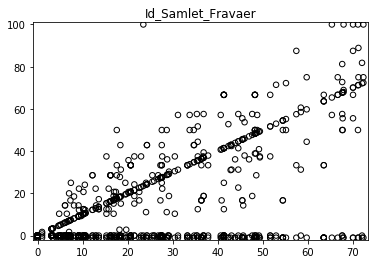

In [27]:
# DF Id and Samlet_Fravaer

x_min = X.iloc[:, 0].min()
x_max = X.iloc[:, 0].max()

y_min = X.iloc[:, 1].min()
y_max = X.iloc[:, 1].max()

# set plot limits
# Plot input data
#creates figure
plt.figure()
plt.title('Id_Samlet_Fravaer')
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)
# plot the points
plt.scatter(X.iloc[:,0], X.iloc[:,1], marker='o', facecolors='none', edgecolors='black', s=30)
plt.show()

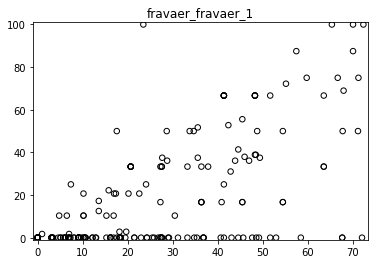

In [28]:
# DF Fravaer and Fravaer_1
x_min = df.iloc[:, 4].min()
x_max = df.iloc[:, 4].max()

y_min = df.iloc[:, 6].min()
y_max = df.iloc[:, 6].max()

# set plot limits
# Plot input data
#creates figure
plt.figure()
plt.title('fravaer_fravaer_1')
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)
# plot the points
plt.scatter(df.iloc[:,4], df.iloc[:,6], marker='o', facecolors='none', edgecolors='black', s=30)
plt.show()

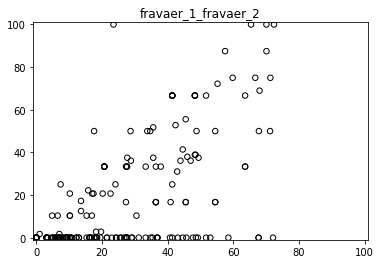

In [29]:
# DF Fravaer_1 and Fravaer_2
x_min = df.iloc[:, 6].min()
x_max = df.iloc[:, 6].max()

y_min = df.iloc[:, 8].min()
y_max = df.iloc[:, 8].max()

# set plot limits
# Plot input data
#creates figure
plt.figure()
plt.title('fravaer_1_fravaer_2')
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)
# plot the points
plt.scatter(df.iloc[:,4], df.iloc[:,6], marker='o', facecolors='none', edgecolors='black', s=30)
plt.show()

In [30]:
df.head(2)

,Id,Samlet_fravaer,Klasse,Fag,Fravaer,Fag_1,Fravaer_1,Fag_2,Fravaer_2,Fag_3,Fravaer_3
36,635774,72.4,SD18i,DLS,72.4,System Integration,100.0,Data Science,75.00,,NaN
37,646053,72.1,SD18i,DLS,72.1,System Integration,0.0,Big Data,81.82,,NaN


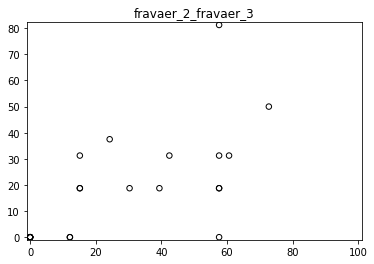

In [31]:
# fravaer_2 and fravaer_3

x_min = df.iloc[:, 8].min()
x_max = df.iloc[:, 8].max()

y_min = df.iloc[:, 10].min()
y_max = df.iloc[:, 10].max()

# set plot limits
# Plot input data
#creates figure
plt.figure()
plt.title('fravaer_2_fravaer_3')
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)
# plot the points
plt.scatter(df.iloc[:,8], df.iloc[:,10], marker='o', facecolors='none', edgecolors='black', s=30)
plt.show()

### Kmeans on 'df'

In [32]:
df.reset_index(drop=True, inplace=True)
df.head()

,Id,Samlet_fravaer,Klasse,Fag,Fravaer,Fag_1,Fravaer_1,Fag_2,Fravaer_2,Fag_3,Fravaer_3
0,635774,72.4,SD18i,DLS,72.4,System Integration,100.0,Data Science,75.00,,NaN
1,646053,72.1,SD18i,DLS,72.1,System Integration,0.0,Big Data,81.82,,NaN
2,879390,71.3,ITS19w1,Intro til IT Sikkerhed,71.3,Net. and Com. security,75.0,System Security,88.89,,NaN
3,666991,71.2,Web and Soft Electives,Big Data,71.2,Databases,50.0,Test,100.00,,NaN
4,397345,70.1,ITS19w1,Intro til IT Sikkerhed,70.1,Net. and Com. security,100.0,System Security,55.56,,NaN


In [33]:
# Elbow method - Checking number of probable Centroids

In [40]:

#dealing with NaN values in 'fravaer' columns
df['Samlet_fravaer'].fillna( -1,inplace=True)
df['Fravaer'].fillna( -1, inplace=True)
df['Fravaer_1'].fillna( -1, inplace=True)
df['Fravaer_2'].fillna( -1, inplace=True)
df['Fravaer_3'].fillna( -1, inplace=True)

student = df['Id'].values
f = df['Fravaer'].values
f1 = df['Fravaer_1'].values
f2 = df['Fravaer_2'].values
f3 = df['Fravaer_3'].values

#df['Fravaer'].dropna(how='any')
#df['Fravaer_1'].dropna(how='any')
#df['Fravaer_2'].dropna(how='any')
#df['Fravaer_3'].dropna(how='any')

X = df.iloc[:,[4, 6, 8,10]].values
df.head()


,Id,Samlet_fravaer,Klasse,Fag,Fravaer,Fag_1,Fravaer_1,Fag_2,Fravaer_2,Fag_3,Fravaer_3
0,635774,72.4,SD18i,DLS,72.4,System Integration,100.0,Data Science,75.00,,-1.0
1,646053,72.1,SD18i,DLS,72.1,System Integration,0.0,Big Data,81.82,,-1.0
2,879390,71.3,ITS19w1,Intro til IT Sikkerhed,71.3,Net. and Com. security,75.0,System Security,88.89,,-1.0
3,666991,71.2,Web and Soft Electives,Big Data,71.2,Databases,50.0,Test,100.00,,-1.0
4,397345,70.1,ITS19w1,Intro til IT Sikkerhed,70.1,Net. and Com. security,100.0,System Security,55.56,,-1.0


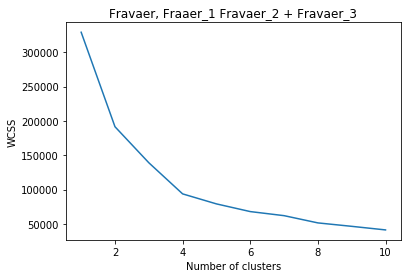

In [61]:

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random',
                    max_iter = 300, n_init = 10,
                   random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Fravaer, Fraaer_1 Fravaer_2 + Fravaer_3')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

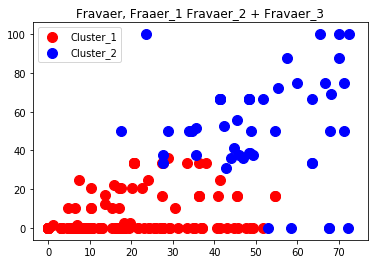

In [63]:
plt.title('Fravaer, Fraaer_1 Fravaer_2 + Fravaer_3')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c='red', label = 'Cluster_1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c='blue', label = 'Cluster_2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s = 100, c='green', label = 'Cluster_2')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1], s = 100, c='yellow', label = 'Cluster_2')

plt.legend()
plt.show()

### Samlet_Fravaer and Fravaer

In [67]:
X = df.iloc[:,[8,10]].values
df.head()

,Id,Samlet_fravaer,Klasse,Fag,Fravaer,Fag_1,Fravaer_1,Fag_2,Fravaer_2,Fag_3,Fravaer_3
0,635774,72.4,SD18i,DLS,72.4,System Integration,100.0,Data Science,75.00,,-1.0
1,646053,72.1,SD18i,DLS,72.1,System Integration,0.0,Big Data,81.82,,-1.0
2,879390,71.3,ITS19w1,Intro til IT Sikkerhed,71.3,Net. and Com. security,75.0,System Security,88.89,,-1.0
3,666991,71.2,Web and Soft Electives,Big Data,71.2,Databases,50.0,Test,100.00,,-1.0
4,397345,70.1,ITS19w1,Intro til IT Sikkerhed,70.1,Net. and Com. security,100.0,System Security,55.56,,-1.0


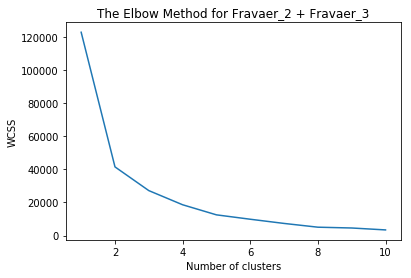

In [68]:

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random',
                    max_iter = 300, n_init = 10,
                   random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method for Fravaer_2 + Fravaer_3')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

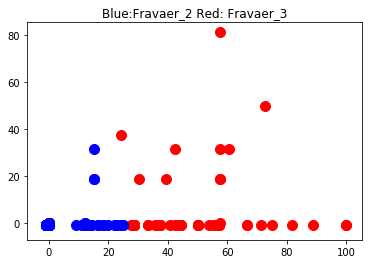

In [70]:
plt.title('Blue:Fravaer_2 Red: Fravaer_3')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c='red', label = 'Cluster_1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c='blue', label = 'Cluster_2')
